<a href="https://colab.research.google.com/github/SohyunKimmm/SohyunKimmm/blob/main/%EA%B0%95%EC%84%9C%EA%B5%AC_%EA%B3%B5%EB%AA%A8%EC%A0%84_%EB%85%B8%EC%9D%B8%EB%B3%B4%ED%96%89%EC%9E%90%EC%82%AC%EA%B3%A0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split  
from sklearn.model_selection import cross_val_score 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier 

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_excel("/content/drive/MyDrive/노인보행자사고 데이터_수정.xlsx")
df

,사고번호,사고년(문자),사고월(문자),사고일(문자),사고시간(문자),사고날짜,사고_년,사고_월,사고_일,사고_시간,...,기상상태,도로형태,가해운전자 차종,가해운전자 성별,가해운전자 연령,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도
0,2019010300100120,2019년,1월,3일,09시,2019-01-03,2019,1,3,9,...,맑음,교차로 - 교차로부근,승용,여,24세,상해없음,보행자,여,72세,중상
1,2019010300100450,2019년,1월,3일,20시,2019-01-03,2019,1,3,20,...,맑음,단일로 - 기타,승용,남,66세,상해없음,보행자,여,80세,중상
2,2019010500100420,2019년,1월,5일,19시,2019-01-05,2019,1,5,19,...,맑음,교차로 - 교차로부근,승용,남,28세,상해없음,보행자,남,77세,경상
3,2019010800100050,2019년,1월,8일,04시,2019-01-08,2019,1,8,4,...,맑음,교차로 - 교차로안,승용,남,25세,상해없음,보행자,남,71세,사망
4,2019011000100420,2019년,1월,10일,19시,2019-01-10,2019,1,10,19,...,맑음,교차로 - 교차로안,화물,남,26세,상해없음,보행자,남,73세,중상
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,2021120700100450,2021년,12월,7일,18시,2021-12-07,2021,12,7,18,...,맑음,단일로 - 기타,승용,남,45세,상해없음,보행자,여,71세,경상
295,2021120800100400,2021년,12월,8일,17시,2021-12-08,2021,12,8,17,...,맑음,교차로 - 교차로안,화물,남,53세,상해없음,보행자,여,75세,중상
296,2021120900100020,2021년,12월,9일,04시,2021-12-09,2021,12,9,4,...,맑음,교차로 - 교차로안,승용,남,77세,상해없음,보행자,남,66세,중상
297,2021121700100540,2021년,12월,17일,19시,2021-12-17,2021,12,17,19,...,맑음,단일로 - 기타,이륜,남,42세,상해없음,보행자,여,70세,경상


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 36 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   사고번호        299 non-null    int64         
 1   사고년(문자)     299 non-null    object        
 2   사고월(문자)     299 non-null    object        
 3   사고일(문자)     299 non-null    object        
 4   사고시간(문자)    299 non-null    object        
 5   사고날짜        299 non-null    datetime64[ns]
 6   사고_년        299 non-null    int64         
 7   사고_월        299 non-null    int64         
 8   사고_일        299 non-null    int64         
 9   사고_시간       299 non-null    int64         
 10  계절          299 non-null    int64         
 11  시간대_4분할     299 non-null    int64         
 12  시간대_2분할     299 non-null    int64         
 13  요일          299 non-null    object        
 14  요일구분        299 non-null    int64         
 15  시군구         299 non-null    object        
 16  사고내용        299 non-null  

In [5]:
df.isnull().sum()

사고번호          0
사고년(문자)       0
사고월(문자)       0
사고일(문자)       0
사고시간(문자)      0
사고날짜          0
사고_년          0
사고_월          0
사고_일          0
사고_시간         0
계절            0
시간대_4분할       0
시간대_2분할       0
요일            0
요일구분          0
시군구           0
사고내용          0
사고내용_숫자       0
사망자수          0
중상자수          0
경상자수          0
부상신고자수        0
사고유형_원본       0
사고유형          0
법규위반          0
노면상태          0
기상상태          0
도로형태          0
가해운전자 차종      0
가해운전자 성별      0
가해운전자 연령      0
가해운전자 상해정도    0
피해운전자 차종      0
피해운전자 성별      0
피해운전자 연령      0
피해운전자 상해정도    0
dtype: int64

In [6]:
df.describe()

,사고번호,사고_년,사고_월,사고_일,사고_시간,계절,시간대_4분할,시간대_2분할,요일구분,사고내용_숫자,사망자수,중상자수,경상자수,부상신고자수,사고유형
count,2.990000e+02,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000
mean,2.020066e+15,2020.000000,6.478261,15.909699,13.451505,2.471572,2.090301,1.307692,1.204013,2.688963,0.060201,0.595318,0.357860,0.026756,3.157191
std,8.512691e+11,0.851371,3.410706,8.692464,4.809124,1.096836,0.887198,0.462312,0.403654,0.607762,0.238257,0.518236,0.533159,0.161640,1.777575
min,2.019010e+15,2019.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.019092e+15,2019.000000,4.000000,8.500000,10.000000,2.000000,1.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2.020072e+15,2020.000000,7.000000,16.000000,14.000000,2.000000,2.000000,1.000000,1.000000,3.000000,0.000000,1.000000,0.000000,0.000000,3.000000
75%,2.021051e+15,2021.000000,9.000000,23.000000,17.000000,3.000000,3.000000,2.000000,1.000000,3.000000,0.000000,1.000000,1.000000,0.000000,5.000000
max,2.021122e+15,2021.000000,12.000000,31.000000,23.000000,4.000000,4.000000,2.000000,2.000000,4.000000,1.000000,3.000000,4.000000,1.000000,5.000000


In [7]:
df.columns

Index(['사고번호', '사고년(문자)', '사고월(문자)', '사고일(문자)', '사고시간(문자)', '사고날짜', '사고_년',
       '사고_월', '사고_일', '사고_시간', '계절', '시간대_4분할', '시간대_2분할', '요일', '요일구분',
       '시군구', '사고내용', '사고내용_숫자', '사망자수', '중상자수', '경상자수', '부상신고자수', '사고유형_원본',
       '사고유형', '법규위반', '노면상태', '기상상태', '도로형태', '가해운전자 차종', '가해운전자 성별',
       '가해운전자 연령', '가해운전자 상해정도', '피해운전자 차종', '피해운전자 성별', '피해운전자 연령',
       '피해운전자 상해정도'],
      dtype='object')

In [8]:
df = df.replace("주간",1).replace("야간",2)
df = df.replace("월요일", 1).replace("화요일", 2).replace("수요일", 3).replace("목요일", 4).replace("금요일", 5).replace("토요일", 6).replace("일요일", 7)
df = df.replace("포장 - 건조", 1).replace("포장 - 젖음/습기",2).replace("포장 - 기타", 3).replace("비포장 - 기타", 4)
df = df.replace("교차로 - 교차로부근", 1).replace("교차로 - 교차로안",2).replace("교차로 - 교차로횡단보도내", 3).replace("기타 - 기타", 4).replace("단일로 - 고가도로위", 5).replace("단일로 - 기타", 6).replace("주차장 - 주차장", 7)
df = df.replace("남", 1).replace("여",2) 

In [9]:
df.describe()

,사고번호,사고_년,사고_월,사고_일,사고_시간,계절,시간대_4분할,시간대_2분할,요일,요일구분,사고내용_숫자,사망자수,중상자수,경상자수,부상신고자수,사고유형,노면상태,도로형태,피해운전자 성별
count,2.990000e+02,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000
mean,2.020066e+15,2020.000000,6.478261,15.909699,13.451505,2.471572,2.090301,1.307692,3.692308,1.204013,2.688963,0.060201,0.595318,0.357860,0.026756,3.157191,1.107023,4.100334,1.658863
std,8.512691e+11,0.851371,3.410706,8.692464,4.809124,1.096836,0.887198,0.462312,1.883959,0.403654,0.607762,0.238257,0.518236,0.533159,0.161640,1.777575,0.395339,2.014203,0.474886
min,2.019010e+15,2019.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,2.019092e+15,2019.000000,4.000000,8.500000,10.000000,2.000000,1.000000,1.000000,2.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2.000000,1.000000
50%,2.020072e+15,2020.000000,7.000000,16.000000,14.000000,2.000000,2.000000,1.000000,4.000000,1.000000,3.000000,0.000000,1.000000,0.000000,0.000000,3.000000,1.000000,4.000000,2.000000
75%,2.021051e+15,2021.000000,9.000000,23.000000,17.000000,3.000000,3.000000,2.000000,5.000000,1.000000,3.000000,0.000000,1.000000,1.000000,0.000000,5.000000,1.000000,6.000000,2.000000
max,2.021122e+15,2021.000000,12.000000,31.000000,23.000000,4.000000,4.000000,2.000000,7.000000,2.000000,4.000000,1.000000,3.000000,4.000000,1.000000,5.000000,4.000000,7.000000,2.000000


In [10]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import pandas as pd
from scipy import stats
import math
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler 
from scipy.stats import boxcox

In [11]:
df.columns

Index(['사고번호', '사고년(문자)', '사고월(문자)', '사고일(문자)', '사고시간(문자)', '사고날짜', '사고_년',
       '사고_월', '사고_일', '사고_시간', '계절', '시간대_4분할', '시간대_2분할', '요일', '요일구분',
       '시군구', '사고내용', '사고내용_숫자', '사망자수', '중상자수', '경상자수', '부상신고자수', '사고유형_원본',
       '사고유형', '법규위반', '노면상태', '기상상태', '도로형태', '가해운전자 차종', '가해운전자 성별',
       '가해운전자 연령', '가해운전자 상해정도', '피해운전자 차종', '피해운전자 성별', '피해운전자 연령',
       '피해운전자 상해정도'],
      dtype='object')

In [12]:
#독립변수 간 상관관계

df1 = df[['사고_시간','시간대_4분할', '시간대_2분할', '요일구분','도로형태', '노면상태', '피해운전자 성별', '사고_월', '계절']]
df1.corr(method="pearson")

,사고_시간,시간대_4분할,시간대_2분할,요일구분,도로형태,노면상태,피해운전자 성별,사고_월,계절
사고_시간,1.000000,0.324673,0.362934,0.142542,0.007433,-0.044916,-0.023431,0.093175,0.199974
시간대_4분할,0.324673,1.000000,0.848349,0.088940,0.030592,-0.056348,-0.085934,0.054436,0.142308
시간대_2분할,0.362934,0.848349,1.000000,0.130024,0.006376,-0.033896,-0.101115,0.106408,0.202603
요일구분,0.142542,0.088940,0.130024,1.000000,-0.144954,0.073001,-0.038349,0.055637,0.054830
도로형태,0.007433,0.030592,0.006376,-0.144954,1.000000,-0.043030,-0.009703,-0.033386,0.054458
노면상태,-0.044916,-0.056348,-0.033896,0.073001,-0.043030,1.000000,0.016380,0.026618,-0.093564
피해운전자 성별,-0.023431,-0.085934,-0.101115,-0.038349,-0.009703,0.016380,1.000000,0.059632,-0.018681
사고_월,0.093175,0.054436,0.106408,0.055637,-0.033386,0.026618,0.059632,1.000000,0.152102
계절,0.199974,0.142308,0.202603,0.054830,0.054458,-0.093564,-0.018681,0.152102,1.000000


In [13]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 22 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [14]:
plt.rc('font', family='NanumBarunGothic')
     

<AxesSubplot:title={'center':'피어슨 상관계수'}>

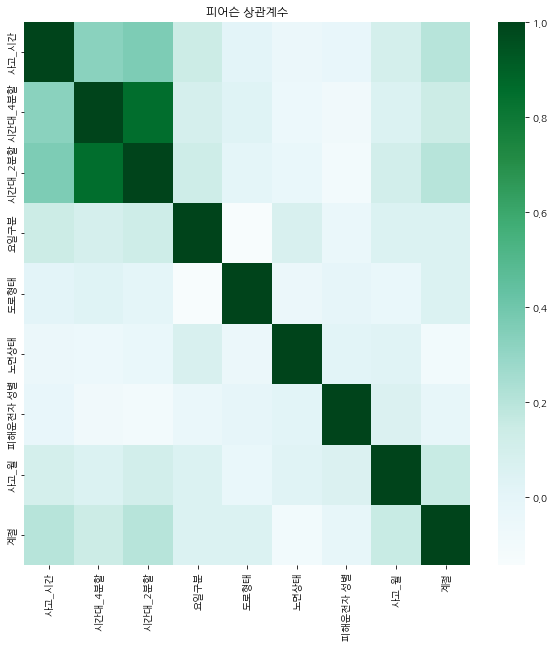

In [15]:
matplotlib.rcParams["font.family"] = "NaNumGothic"
colormap = plt.cm.BuGn #'BuGn' -> BlueGreen
plt.figure(figsize=(10,10))
plt.title("피어슨 상관계수")
sns.heatmap(df1.astype(float).corr(), cmap=colormap) #'cmap=colormap' -> 표 색상변경(히트맵)
     

In [16]:
df.columns

Index(['사고번호', '사고년(문자)', '사고월(문자)', '사고일(문자)', '사고시간(문자)', '사고날짜', '사고_년',
       '사고_월', '사고_일', '사고_시간', '계절', '시간대_4분할', '시간대_2분할', '요일', '요일구분',
       '시군구', '사고내용', '사고내용_숫자', '사망자수', '중상자수', '경상자수', '부상신고자수', '사고유형_원본',
       '사고유형', '법규위반', '노면상태', '기상상태', '도로형태', '가해운전자 차종', '가해운전자 성별',
       '가해운전자 연령', '가해운전자 상해정도', '피해운전자 차종', '피해운전자 성별', '피해운전자 연령',
       '피해운전자 상해정도'],
      dtype='object')

In [17]:
#Y=사고내용_숫자(범주형) - 다항로지스틱회귀
#1. 부상신고사고, 2. 경상사고, 3. 중상사고, 4. 사망사고

#X= 계절(범주형), 시간대_4분할(범주형), 요일구분(범주형), 사고유형(범주형), 노면상태, 도로형태, 피해운전자 성별


#1. 변수선택
X = df[['시간대_2분할','노면상태','도로형태', '요일구분']]
Y = df[['사고내용_숫자']]

#2. train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

#3. 데이터 전처리(preprocessing)
ct = ColumnTransformer([("onehot", OneHotEncoder(sparse = False), ['시간대_2분할','노면상태','도로형태', '요일구분'])])
ct.fit(X_train)

X_train = ct.transform(X_train)
X_test = ct.transform(X_test)


/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [18]:
#의사결정나무

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

DT_model = DecisionTreeClassifier(random_state=0, max_depth= 3)
DT_model.fit(X_train, Y_train)
Y_pred = DT_model.predict(X_test)
print("accuracy : {:.3f}".format(DT_model.score(X_train, Y_train)))
print(classification_report(Y_test, Y_pred))

accuracy : 0.584
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.25      0.15      0.19        26
           3       0.65      0.83      0.73        58
           4       0.00      0.00      0.00         4

    accuracy                           0.58        90
   macro avg       0.22      0.25      0.23        90
weighted avg       0.49      0.58      0.52        90



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [19]:
feature_name = X.columns
feature_importance = DT_model.feature_importances_
sorted(zip(feature_importance, feature_name), reverse= True)


[(0.284526904154821, '노면상태'),
 (0.18774307500737356, '도로형태'),
 (0.0, '요일구분'),
 (0.0, '시간대_2분할')]

In [20]:
#로지스틱 회귀

from sklearn.linear_model import LogisticRegression

logit = LogisticRegression(C = 1, random_state = 0)

logit.fit(X_train, Y_train)
Y_pred = logit.predict(X_test)

#Y_Pred
print("R2 : {:.3f}".format(logit.score(X_train, Y_train)))

from sklearn.metrics import classification_report
print("accuracy : {:.3f}".format(logit.score(X_train, Y_train)))
print(classification_report(Y_test, Y_pred))

#절편
print(logit.intercept_)
#가중치
print(logit.coef_) 

R2 : 0.589
accuracy : 0.589


/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.50      0.12      0.19        26
           3       0.65      0.95      0.77        58
           4       0.00      0.00      0.00         4

    accuracy                           0.64        90
   macro avg       0.29      0.27      0.24        90
weighted avg       0.57      0.64      0.55        90

[-2.73817291  1.682524    1.87630549 -0.82065658]
[[ 0.05040115 -0.05090097  0.15803573 -0.09629578 -0.06024366 -0.0019961
  -0.23402853 -0.21482677 -0.12706199 -0.0830589  -0.00415526  0.67063147
  -0.00799984  0.20528222 -0.20578204]
 [ 0.04111277 -0.04077957 -0.32507086 -0.25465011  0.32034498  0.25970919
  -0.13080093  0.26667351 -0.27443766  0.6703932  -0.27349293 -0.05677922
  -0.20122278 -0.30609441  0.3064276 ]
 [ 0.21992936 -0.21915747  0.08705112  0.1438366   0.02156916 -0.25168499
  -0.47903291  0.25557987  0.33387933 -0.18386705  0.31006342 -0.483

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
